### Import the libraries

In [353]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


from mpl_toolkits.mplot3d import Axes3D

### Get the data

In [354]:
# Get data from csv file
iris_file = pd.read_csv('./datasets/wineQuality.csv')
iris = pd.DataFrame(iris_file)

# Prepare the data
house_feature_names = iris.columns.values.tolist()[1:]
house_data = iris[house_feature_names]
house_target = iris[iris.columns.values.tolist()[0]]
house_target_names = list(set(house_target))

print('Features:',house_feature_names, '   Classes:', house_target_names)


Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']    Classes: ['red', 'white']


In [355]:
import pandas as pd
from io import StringIO

# Seu conjunto de dados
data = """type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
white,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
white,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
white,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
white,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
white,6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
white,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
white,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
white,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6
white,8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12,5
white,8.6,0.23,0.4,4.2,0.035,17,109,0.9947,3.14,0.53,9.7,5
white,7.9,0.18,0.37,1.2,0.04,16,75,0.992,3.18,0.63,10.8,5
white,6.6,0.16,0.4,1.5,0.044,48,143,0.9912,3.54,0.52,12.4,7
white,8.3,0.42,0.62,19.25,0.04,41,172,1.0002,2.98,0.67,9.7,5
white,6.6,0.17,0.38,1.5,0.032,28,112,0.9914,3.25,0.55,11.4,7
white,6.3,0.48,0.04,1.1,0.046,30,99,0.9928,3.24,0.36,9.6,6
white,6.4,0.66,0.48,1.2,0.029,29,75,0.9892,3.33,0.39,12.8,8
white,7.4,0.34,0.42,1.1,0.033,17,171,0.9917,3.12,0.53,11.3,6
white,6.5,0.31,0.14,7.5,0.044,34,133,0.9955,3.22,0.5,9.5,5
white,6.2,0.66,0.48,1.2,0.029,29,75,0.9892,3.33,0.39,12.8,8
white,6.4,0.31,0.38,2.9,0.038,19,102,0.9912,3.17,0.35,11,7
white,6.8,0.26,0.42,1.7,0.049,41,122,0.993,3.47,0.48,10.5,8
white,7.6,0.67,0.14,1.5,0.074,25,168,0.9937,3.05,0.51,9.3,5
white,6.6,0.27,0.41,1.3,0.052,16,142,0.9951,3.42,0.47,10,6
white,7,0.25,0.32,9,0.046,56,245,0.9955,3.25,0.5,10.4,6
white,6.9,0.24,0.35,1,0.052,35,146,0.993,3.45,0.44,10,6
white,7,0.28,0.39,8.7,0.051,32,141,0.9961,3.38,0.53,10.5,6
white,7.4,0.27,0.48,1.1,0.047,17,132,0.9914,3.19,0.49,11.6,6
white,7.2,0.32,0.36,2,0.033,37,114,0.9906,3.1,0.71,12.3,7
white,8.5,0.24,0.39,10.4,0.044,20,142,0.9974,3.2,0.53,10,6
white,8.3,0.14,0.34,1.1,0.042,7,47,0.9934,3.47,0.4,10.2,6
white,7.4,0.25,0.36,2.05,0.05,31,100,0.992,3.19,0.44,10.8,6
white,6.2,0.12,0.34,3.5,0.045,43,117,0.9939,3.42,0.51,9,6
white,5.8,0.27,0.2,14.95,0.044,22,179,0.9962,3.37,0.37,10.2,5
white,7.3,0.28,0.43,1.7,0.08,21,123,0.9905,3.19,0.42,12.8,5
white,6.5,0.39,0.23,5.4,0.051,25,149,0.9934,3.24,0.35,10,5
white,7,0.33,0.32,1.2,0.053,38,138,0.9906,3.13,0.28,11.2,6
white,7.3,0.24,0.39,17.95,0.057,45,149,0.9999,3.21,0.36,8.6,5
white,7.3,0.24,0.39,17.95,0.057,45,149,0.9999,3.21,0.36,8.6,5
white,6.7,0.23,0.39,2.5,0.172,63,158,0.9937,3.11,0.36,9.4,6
white,6.7,0.24,0.39,2.9,0.173,63,157,0.9937,3.1,0.34,9.4,6
white,7,0.31,0.26,7.4,0.069,28,160,0.9954,3.13,0.46,9.8,6
white,6.6,0.24,0.27,1.4,0.057,33,152,0.9934,3.22,0.56,9.5,6
white,6.7,0.23,0.26,1.4,0.06,33,154,0.9934,3.24,0.56,9.5,6
white,7.4,0.18,0.31,1.4,0.058,38,167,0.9931,3.16,0.53,10,7
white,6.2,0.45,0.26,4.4,0.063,63,206,0.994,3.27,0.52,9.8,4
white,6.2,0.46,0.25,4.4,0.066,62,207,0.9939,3.25,0.52,9.8,5
white,7,0.31,0.26,7.4,0.069,28,160,0.9954,3.13,0.46,9.8,6
white,6.9,0.19,0.35,5,0.067,32,150,0.995,3.36,0.48,9.8,5
white,7.2,0.19,0.31,1.6,0.062,31,173,0.9917,3.35,0.44,11.7,6
white,6.6,0.25,0.29,1.1,0.068,39,124,0.9914,3.34,0.58,11,7
white,6.2,0.16,0.33,1.1,0.057,21,82,0.991,3.32,0.46,10.9,7
white,6.4,0.18,0.35,1,0.045,39,108,0.9911,3.31,0.35,10.9,6
white,6.8,0.2,0.59,0.9,0.147,38,132,0.993,3.53,0.38,9.1,6
white,6.9,0.25,0.35,1.3,0.039,29,191,0.9908,3.13,0.52,11,6
white,7.2,0.21,0.34,11.9,0.043,37,213,0.9962,3.09,0.5,9.6,6
white,6,0.19,0.26,12.4,0.048,50,147,0.9972,3.3,0.36,8.9,6
white,6.6,0.38,0.15,4.6,0.044,25,78,0.9931,3.11,0.38,10.2,6
white,7.4,0.2,0.36,1.2,0.038,44,111,0.9926,3.36,0.34,9.9,6
white,6.8,0.22,0.24,4.9,0.092,30,123,0.9951,3.03,0.46,8.6,6
white,6,0.19,0.26,12.4,0.048,50,147,0.9972,3.3,0.36,8.9,6
white,7,0.47,0.07,1.1,0.035,17,151,0.991,3.02,0.34,10.5,5
white,6.6,0.38,0.15,4.6,0.044,25,78,0.9931,3.11,0.38,10.2,6
white,7.2,0.24,0.27,1.4,0.038,31,122,0.9927,3.15,0.46,10.3,6
white,6.2,0.35,0.03,1.2,0.064,29,120,0.9934,3.22,0.54,9.1,5
white,6.4,0.26,0.24,6.4,0.04,27,124,0.9903,3.22,0.49,12.6,7
white,6.7,0.25,0.13,1.2,0.041,81,174,0.992,3.14,0.42,9.8,5
white,6.7,0.23,0.31,2.1,0.046,30,96,0.9926,3.33,0.64,10.7,8
white,7.4,0.24,0.29,10.1,0.05,21,105,0.9962,3.13,0.35,9.5,5
white,6.2,0.27,0.43,7.8,0.056,48,244,0.9956,3.1,0.51,9,6
white,6.8,0.3,0.23,4.6,0.061,50.5,238.5,0.9958,3.32,0.6,9.5,5
white,6,0.27,0.28,4.8,0.063,31,201,0.9964,3.69,0.71,10,5
white,8.6,0.23,0.46,1,0.054,9,72,0.9941,2.95,0.49,9.1,6
white,6.7,0.23,0.31,2.1,0.046,30,96,0.9926,3.33,0.64,10.7,8
white,7.4,0.24,0.29,10.1,0.05,21,105,0.9962,3.13,0.35,9.5,5
white,7.1,0.18,0.36,1.4,0.043,31,87,0.9898,3.26,0.37,12.7,7
white,7,0.32,0.34,1.3,0.042,20,69,0.9912,3.31,0.65,12,7
white,7.4,0.18,0.3,8.8,0.064,26,103,0.9961,2.94,0.56,9.3,5
white,6.7,0.54,0.28,5.4,0.06,21,105,0.9949,3.27,0.37,9,5
white,6.8,0.22,0.31,1.4,0.053,34,114,0.9929,3.39,0.77,10.6,6
white,7.1,0.2,0.34,16,0.05,51,166,0.9985,3.21,0.6,9.2,6
white,7.1,0.34,0.2,6.1,0.063,47,164,0.9946,3.17,0.42,10,5
white,7.3,0.22,0.3,8.2,0.047,42,207,0.9966,3.33,0.46,9.5,6
white,7.1,0.43,0.61,11.8,0.045,54,155,0.9974,3.11,0.45,8.7,5
white,7.1,0.44,0.62,11.8,0.044,52,152,0.9975,3.12,0.46,8.7,6
white,7.2,0.36,0.63,11,0.044,55,156,0.9974,3.09,0.44,8.7,6
white,6.8,0.25,0.31,13.3,0.05,69,202,0.9972,3.22,0.48,9.7,6
white,7.1,0.43,0.61,11.8,0.045,54,155,0.9974,3.11,0.45,8.7,5
white,7.1,0.44,0.62,11.8,0.044,52,152,0.9975,3.12,0.46,8.7,6
white,7.2,0.39,0.63,11,0.044,55,156,0.9974,3.09,0.44,8.7,6
white,6.1,0.27,0.43,7.5,0.049,65,243,0.9957,3.12,0.47,9,5
white,6.9,0.24,0.33,1.7,0.035,47,136,0.99,3.26,0.4,12.6,7
white,6.9,0.21,0.33,1.8,0.034,48,136,0.9899,3.25,0.41,12.6,7
white,7.5,0.17,0.32,1.7,0.04,51,148,0.9916,3.21,0.44,11.5,7
white,7.1,0.26,0.29,12.4,0.044,62,240,0.9969,3.04,0.42,9.2,6
white,6,0.34,0.66,15.9,0.046,26,164,0.9979,3.14,0.5,8.8,6
white,8.6,0.265,0.36,1.2,0.034,15,80,0.9913,2.95,0.36,11.4,7
white,9.8,0.36,0.46,10.5,0.113,4,83,0.9956,2.89,0.3,10.1,4
white,6,0.34,0.66,15.9,0.046,26,164,0.9979,3.14,0.5,8.8,6
white,7.4,0.25,0.37,13.5,0.06,52,192,0.9975,3,0.44,9.1,5
white,7.1,0.12,0.32,9.6,0.054,64,162,0.9962,3.4,0.41,9.4,5
white,6,0.21,0.24,12.1,0.05,55,164,0.997,3.34,0.39,9.4,5
white,7.5,0.305,0.4,18.9,0.059,44,170,1,2.99,0.46,9,5
white,7.4,0.25,0.37,13.5,0.06,52,192,0.9975,3,0.44,9.1,5
white,7.3,0.13,0.32,14.4,0.051,34,109,0.9974,3.2,0.35,9.2,6
white,7.1,0.12,0.32,9.6,0.054,64,162,0.9962,3.4,0.41,9.4,5
white,7.1,0.23,0.35,16.5,0.04,60,171,0.999,3.16,0.59,9.1,6
white,7.1,0.23,0.35,16.5,0.04,60,171,0.999,3.16,0.59,9.1,6
white,6.9,0.33,0.28,1.3,0.051,37,187,0.9927,3.27,0.6,10.3,5
white,6.5,0.17,0.54,8.5,0.082,64,163,0.9959,2.89,0.39,8.8,6
white,7.2,0.27,0.46,18.75,0.052,45,255,1,3.04,0.52,8.9,5
white,7.2,0.31,0.5,13.3,0.056,68,195,0.9982,3.01,0.47,9.2,5
white,6.7,0.41,0.34,9.2,0.049,29,150,0.9968,3.22,0.51,9.1,5
white,6.7,0.41,0.34,9.2,0.049,29,150,0.9968,3.22,0.51,9.1,5
white,5.5,0.485,0,1.5,0.065,8,103,0.994,3.63,0.4,9.7,4
white,6,0.31,0.24,3.3,0.041,25,143,0.9914,3.31,0.44,11.3,6
white,7,0.14,0.4,1.7,0.035,16,85,0.9911,3.19,0.42,11.8,6
white,7.2,0.31,0.5,13.3,0.056,68,195,0.9982,3.01,0.47,9.2,5
white,7.3,0.32,0.48,13.3,0.06,57,196,0.9982,3.04,0.5,9.2,5
white,5.9,0.36,0.04,5.7,0.046,21,87,0.9934,3.22,0.51,10.2,5
red,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
red,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
red,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
red,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
red,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
red,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
red,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
red,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
red,7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5
red,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5
red,7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5
red,5.6,0.615,0,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5
red,7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5
red,8.9,0.62,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,5
red,8.9,0.62,0.19,3.9,0.17,51,148,0.9986,3.17,0.93,9.2,5
red,8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.3,0.75,10.5,7
red,8.1,0.56,0.28,1.7,0.368,16,56,0.9968,3.11,1.28,9.3,5
red,7.4,0.59,0.08,4.4,0.086,6,29,0.9974,3.38,0.5,9,4
red,7.9,0.32,0.51,1.8,0.341,17,56,0.9969,3.04,1.08,9.2,6
red,8.9,0.22,0.48,1.8,0.077,29,60,0.9968,3.39,0.53,9.4,6
red,7.6,0.39,0.31,2.3,0.082,23,71,0.9982,3.52,0.65,9.7,5
red,7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5
red,8.5,0.49,0.11,2.3,0.084,9,67,0.9968,3.17,0.53,9.4,5
red,6.9,0.4,0.14,2.4,0.085,21,40,0.9968,3.43,0.63,9.7,6
red,6.3,0.39,0.16,1.4,0.08,11,23,0.9955,3.34,0.56,9.3,5
red,7.6,0.41,0.24,1.8,0.08,4,11,0.9962,3.28,0.59,9.5,5
red,7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5
red,7.1,0.71,0,1.9,0.08,14,35,0.9972,3.47,0.55,9.4,5
red,7.8,0.645,0,2,0.082,8,16,0.9964,3.38,0.59,9.8,6
red,6.7,0.675,0.07,2.4,0.089,17,82,0.9958,3.35,0.54,10.1,5
red,6.9,0.685,0,2.5,0.105,22,37,0.9966,3.46,0.57,10.6,6
red,8.3,0.655,0.12,2.3,0.083,15,113,0.9966,3.17,0.66,9.8,5
red,6.9,0.605,0.12,10.7,0.073,40,83,0.9993,3.45,0.52,9.4,6
red,5.2,0.32,0.25,1.8,0.103,13,50,0.9957,3.38,0.55,9.2,5
red,7.8,0.645,0,5.5,0.086,5,18,0.9986,3.4,0.55,9.6,6
red,7.8,0.6,0.14,2.4,0.086,3,15,0.9975,3.42,0.6,10.8,6
red,8.1,0.38,0.28,2.1,0.066,13,30,0.9968,3.23,0.73,9.7,7
red,5.7,1.13,0.09,1.5,0.172,7,19,0.994,3.5,0.48,9.8,4
red,7.3,0.45,0.36,5.9,0.074,12,87,0.9978,3.33,0.83,10.5,5
red,7.3,0.45,0.36,5.9,0.074,12,87,0.9978,3.33,0.83,10.5,5
red,8.8,0.61,0.3,2.8,0.088,17,46,0.9976,3.26,0.51,9.3,4
red,7.5,0.49,0.2,2.6,0.332,8,14,0.9968,3.21,0.9,10.5,6
red,8.1,0.66,0.22,2.2,0.069,9,23,0.9968,3.3,1.2,10.3,5
red,6.8,0.67,0.02,1.8,0.05,5,11,0.9962,3.48,0.52,9.5,5
red,4.6,0.52,0.15,2.1,0.054,8,65,0.9934,3.9,0.56,13.1,4
red,7.7,0.935,0.43,2.2,0.114,22,114,0.997,3.25,0.73,9.2,5
red,8.7,0.29,0.52,1.6,0.113,12,37,0.9969,3.25,0.58,9.5,5
red,6.4,0.4,0.23,1.6,0.066,5,12,0.9958,3.34,0.56,9.2,5
red,5.6,0.31,0.37,1.4,0.074,12,96,0.9954,3.32,0.58,9.2,5
red,8.8,0.66,0.26,1.7,0.074,4,23,0.9971,3.15,0.74,9.2,5
red,6.6,0.52,0.04,2.2,0.069,8,15,0.9956,3.4,0.63,9.4,6
red,6.6,0.5,0.04,2.1,0.068,6,14,0.9955,3.39,0.64,9.4,6
red,8.6,0.38,0.36,3,0.081,30,119,0.997,3.2,0.56,9.4,5
red,7.6,0.51,0.15,2.8,0.11,33,73,0.9955,3.17,0.63,10.2,6
red,7.7,0.62,0.04,3.8,0.084,25,45,0.9978,3.34,0.53,9.5,5
red,10.2,0.42,0.57,3.4,0.07,4,10,0.9971,3.04,0.63,9.6,5
red,7.5,0.63,0.12,5.1,0.111,50,110,0.9983,3.26,0.77,9.4,5
red,7.8,0.59,0.18,2.3,0.076,17,54,0.9975,3.43,0.59,10,5
red,7.3,0.39,0.31,2.4,0.074,9,46,0.9962,3.41,0.54,9.4,6
red,8.8,0.4,0.4,2.2,0.079,19,52,0.998,3.44,0.64,9.2,5
red,7.7,0.69,0.49,1.8,0.115,20,112,0.9968,3.21,0.71,9.3,5
red,7.5,0.52,0.16,1.9,0.085,12,35,0.9968,3.38,0.62,9.5,7
red,7,0.735,0.05,2,0.081,13,54,0.9966,3.39,0.57,9.8,5
red,7.2,0.725,0.05,4.65,0.086,4,11,0.9962,3.41,0.39,10.9,5
red,7.2,0.725,0.05,4.65,0.086,4,11,0.9962,3.41,0.39,10.9,5
red,7.5,0.52,0.11,1.5,0.079,11,39,0.9968,3.42,0.58,9.6,5
red,6.6,0.705,0.07,1.6,0.076,6,15,0.9962,3.44,0.58,10.7,5
red,9.3,0.32,0.57,2,0.074,27,65,0.9969,3.28,0.79,10.7,5
red,8,0.705,0.05,1.9,0.074,8,19,0.9962,3.34,0.95,10.5,6
red,7.7,0.63,0.08,1.9,0.076,15,27,0.9967,3.32,0.54,9.5,6
red,7.7,0.67,0.23,2.1,0.088,17,96,0.9962,3.32,0.48,9.5,5
red,7.7,0.69,0.22,1.9,0.084,18,94,0.9961,3.31,0.48,9.5,5
red,8.3,0.675,0.26,2.1,0.084,11,43,0.9976,3.31,0.53,9.2,4
red,9.7,0.32,0.54,2.5,0.094,28,83,0.9984,3.28,0.82,9.6,5
red,8.8,0.41,0.64,2.2,0.093,9,42,0.9986,3.54,0.66,10.5,5
red,8.8,0.41,0.64,2.2,0.093,9,42,0.9986,3.54,0.66,10.5,5
red,6.8,0.785,0,2.4,0.104,14,30,0.9966,3.52,0.55,10.7,6
red,6.7,0.75,0.12,2,0.086,12,80,0.9958,3.38,0.52,10.1,5
red,8.3,0.625,0.2,1.5,0.08,27,119,0.9972,3.16,1.12,9.1,4
red,6.2,0.45,0.2,1.6,0.069,3,15,0.9958,3.41,0.56,9.2,5
red,7.8,0.43,0.7,1.9,0.464,22,67,0.9974,3.13,1.28,9.4,5
red,7.4,0.5,0.47,2,0.086,21,73,0.997,3.36,0.57,9.1,5
red,7.3,0.67,0.26,1.8,0.401,16,51,0.9969,3.16,1.14,9.4,5
red,6.3,0.3,0.48,1.8,0.069,18,61,0.9959,3.44,0.78,10.3,6
red,6.9,0.55,0.15,2.2,0.076,19,40,0.9961,3.41,0.59,10.1,5
red,8.6,0.49,0.28,1.9,0.11,20,136,0.9972,2.93,1.95,9.9,6
red,7.7,0.49,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5
red,9.3,0.39,0.44,2.1,0.107,34,125,0.9978,3.14,1.22,9.5,5
red,7,0.62,0.08,1.8,0.076,8,24,0.9978,3.48,0.53,9,5
red,7.9,0.52,0.26,1.9,0.079,42,140,0.9964,3.23,0.54,9.5,5
red,8.6,0.49,0.28,1.9,0.11,20,136,0.9972,2.93,1.95,9.9,6
red,8.6,0.49,0.29,2,0.11,19,133,0.9972,2.93,1.98,9.8,5
red,7.7,0.49,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5
red,5,1.02,0.04,1.4,0.045,41,85,0.9938,3.75,0.48,10.5,4
red,4.7,0.6,0.17,2.3,0.058,17,106,0.9932,3.85,0.6,12.9,6
red,6.8,0.775,0,3,0.102,8,23,0.9965,3.45,0.56,10.7,5
red,7,0.5,0.25,2,0.07,3,22,0.9963,3.25,0.63,9.2,5
red,7.6,0.9,0.06,2.5,0.079,5,10,0.9967,3.39,0.56,9.8,5
red,8.1,0.545,0.18,1.9,0.08,13,35,0.9972,3.3,0.59,9,6
red,8.3,0.61,0.3,2.1,0.084,11,50,0.9972,3.4,0.61,10.2,6
"""


# Criar DataFrame
df = pd.read_csv(StringIO(data), header=None)

# Encontrar linhas com NaN
nan_rows = df[df.isnull().any(axis=1)]

# Imprimir linhas com NaN
print(nan_rows)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Index: []


#### Build the model and evaluate it
Decision trees, Naive bayes and KNN

In [356]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1234)


# Data selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_data, house_target, test_size=0.33, random_state=27)


# Train the model on the training set
clf_model = clf.fit(X_train, y_train)


# Make predictions on new data
# X_new = np.array([[5.1, 3.5, 1.4, 0.2]])
# prediction = clf_model.predict(X_new)
# print("Prediction:", prediction)

# Evaluate the model on the test set
hd_score = clf_model.score(X_test, y_test)
print("Houldout test accuracy:", hd_score)

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score
acc_score = cross_val_score(clf, X_train, y_train, cv=10)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )
f1_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print("Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

# More metrics: Precision Recall scores and Confusion matrix
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training test\n")
print(metrics.classification_report(y_test, clf_model.predict(X_test), digits=3))
print(metrics.confusion_matrix(y_test, clf_model.predict(X_test)))



Houldout test accuracy: 0.9459459459459459
CV Mean Accuracy: 0.939 (+/- 0.036)
Mean F1: 0.938 (+/- 0.037)
Precision, Recall, Confusion matrix, in training test

              precision    recall  f1-score   support

         red      0.971     0.917     0.943        36
       white      0.925     0.974     0.949        38

    accuracy                          0.946        74
   macro avg      0.948     0.945     0.946        74
weighted avg      0.947     0.946     0.946        74

[[33  3]
 [ 1 37]]


Plot Tree with plot_tree

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
['red', 'white']


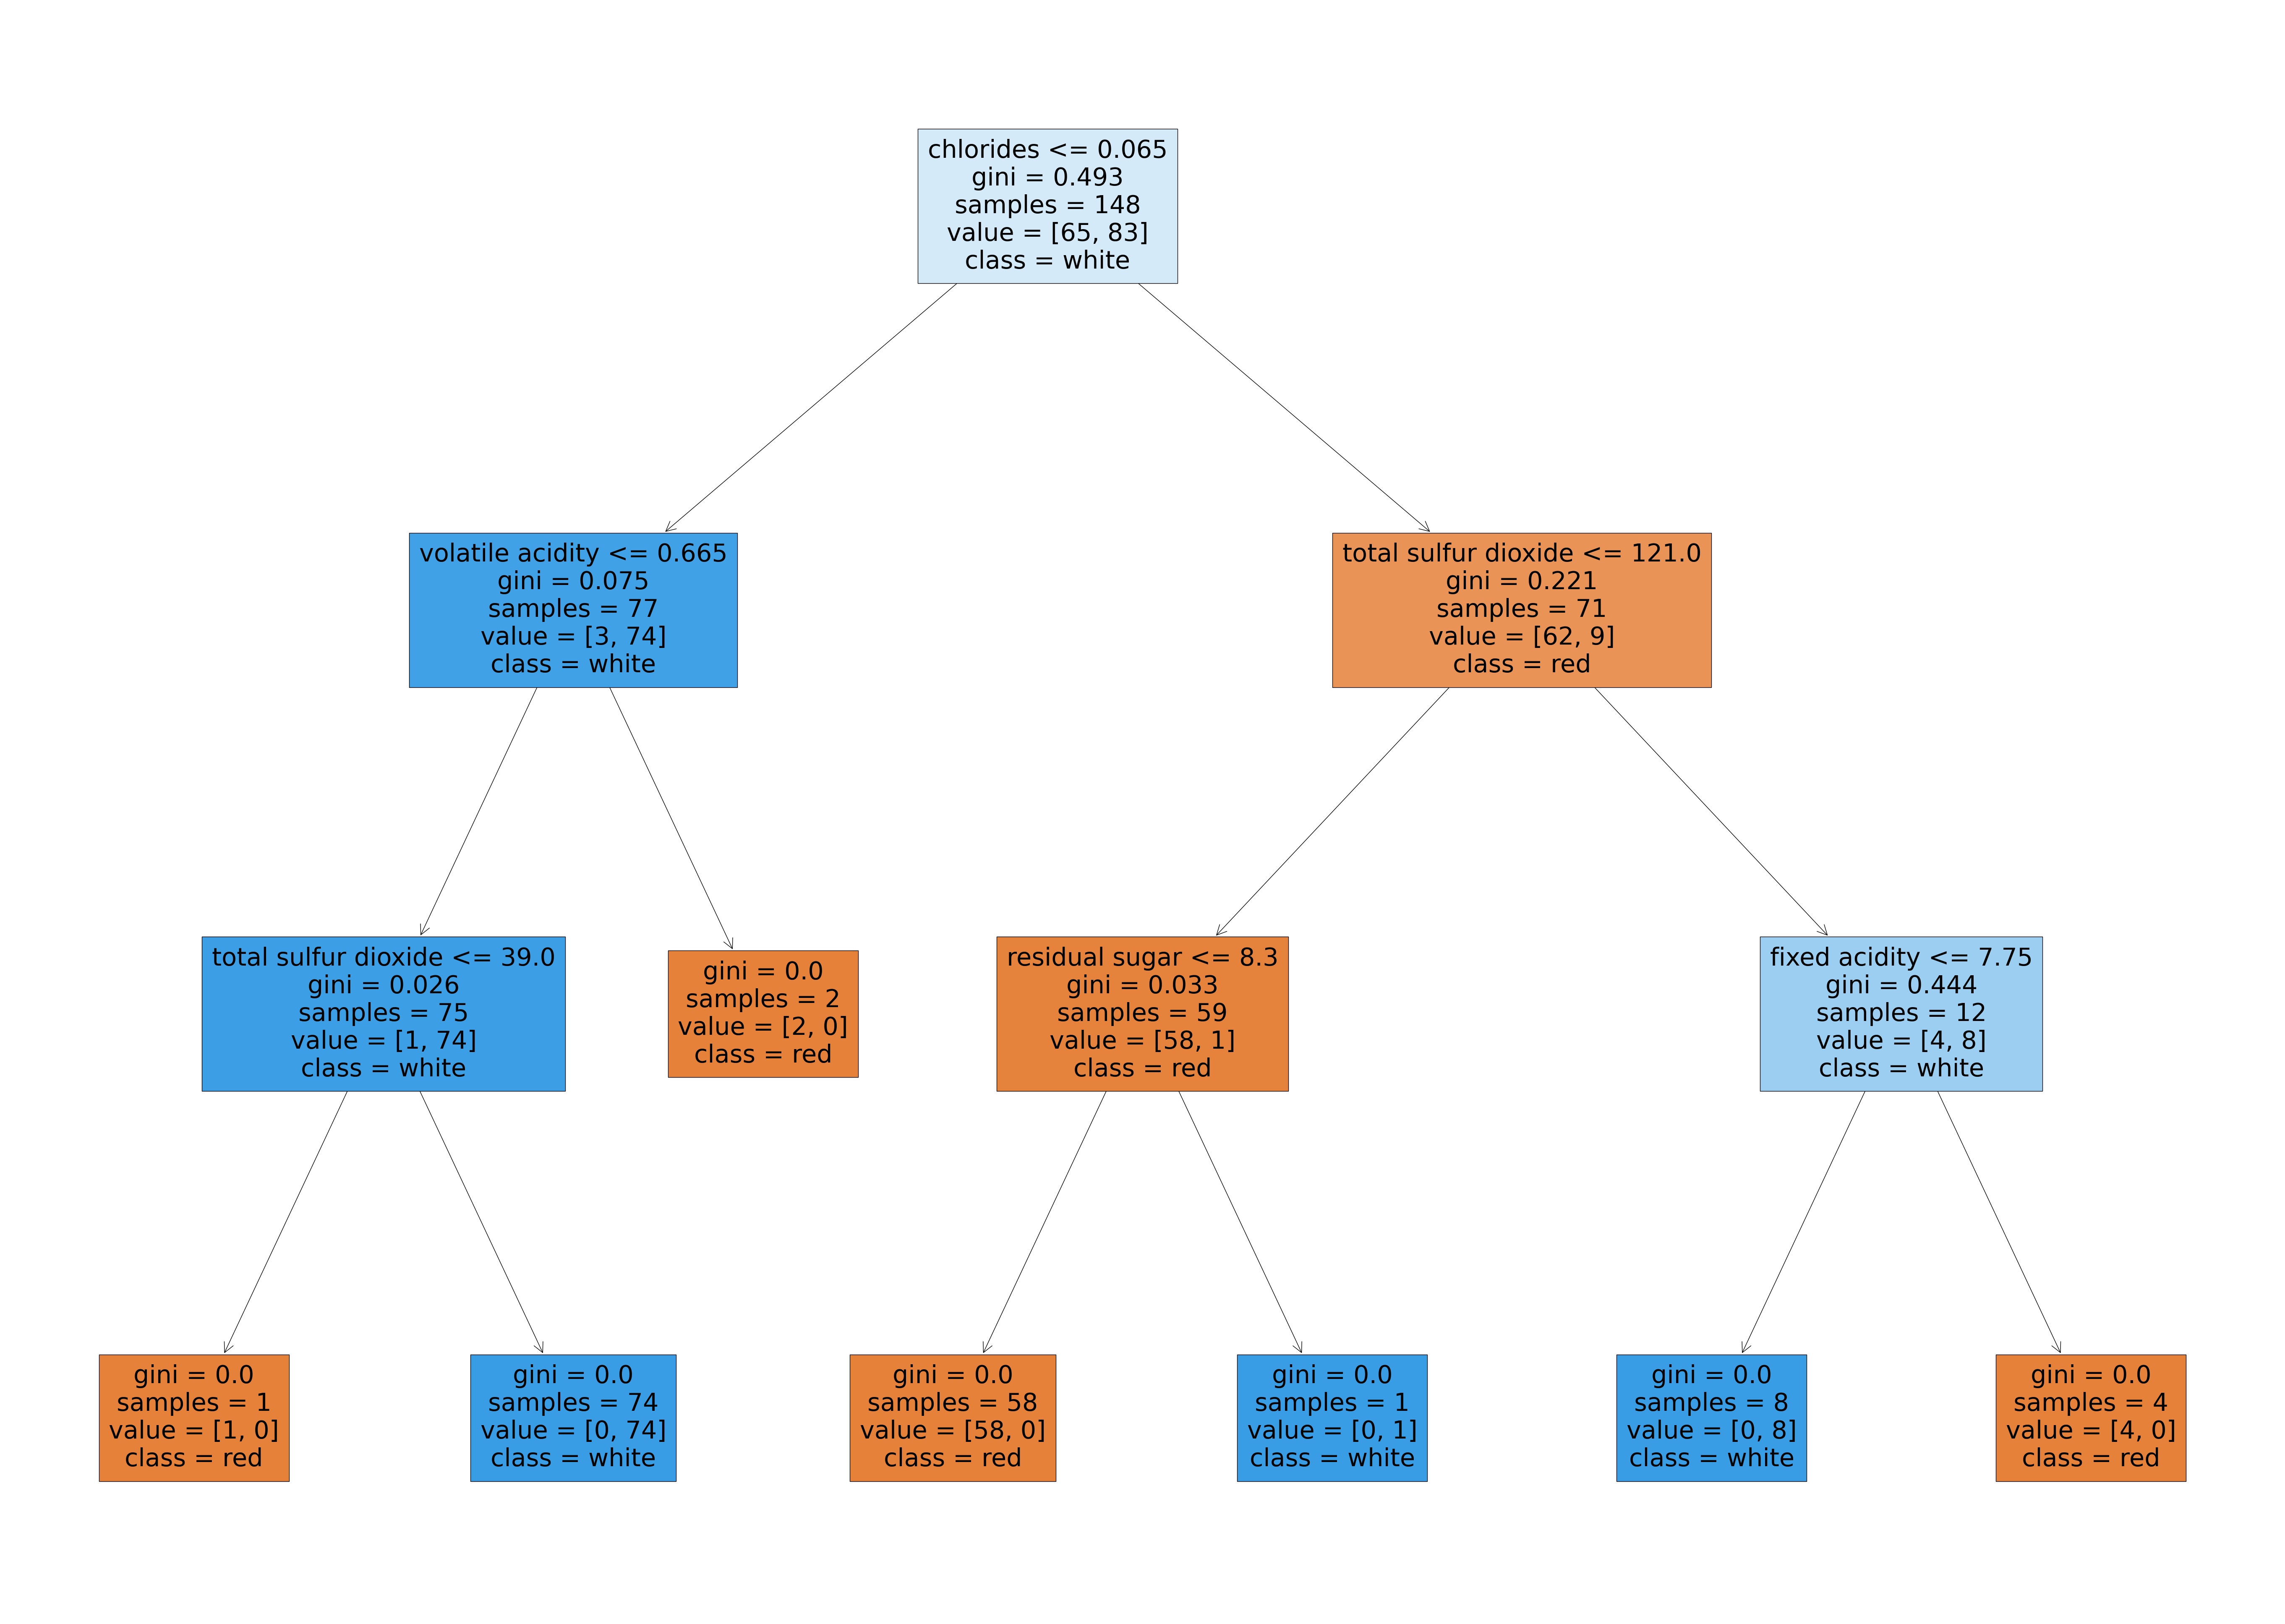

In [357]:
# If you have created the Decision Tree model
from sklearn import tree
from matplotlib import pyplot as plt

print(house_feature_names)
print(house_target_names)

fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(clf_model, 
                   feature_names=house_feature_names,  
                   class_names=house_target_names,
                   filled=True)

## Clustering with K-Means

In [358]:
# Import datasets library
from sklearn import datasets
iris_file = pd.read_csv('./datasets/wineQuality.csv')
iris = pd.DataFrame(iris_file)

# Prepare the data
house_feature_names = iris.columns.values.tolist()[1:]
house_data = iris[house_feature_names]
house_target = iris[iris.columns.values.tolist()[0]]
house_target_names = list(set(house_target))

# Preliminary data exploration
print(house_data.shape)     # Output: (150, 4)
print(house_feature_names)  # Output: ['sepal length (cm)', ...]
print(house_data[:13])

# Preprocessing the data (standardize)
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(house_data)
print(scaled_iris[:13])

(222, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
4             7.2              0.23         0.32            8.50      0.058   
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1

### Finding the Optimal Number of Clusters with the Elbow Method

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

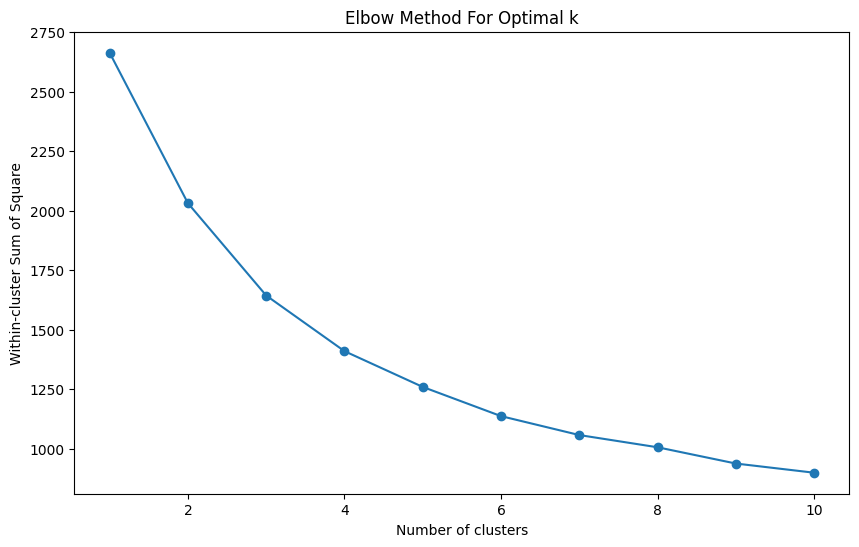

In [359]:
# Calculate the within-cluster sum of square across different cluster counts
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_iris)
    inertia.append(kmeans.inertia_)# Plot the elbow graph
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

### Clustering and evaluating

In [360]:
# Assuming the elbow is at three clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_iris)

# Evaluating
# print(clusters)
# Use LabelEncoder to convert string labels to numeric labels
label_encoder = LabelEncoder()
house_target_numeric = label_encoder.fit_transform(house_target)

# Adjusting clusters
adj_clusters = [(x + 2) %3 for x in clusters]

print(confusion_matrix(house_target_numeric, adj_clusters))
print(classification_report(house_target_numeric, adj_clusters))

[[97  4  0]
 [ 6 54 61]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       101
           1       0.93      0.45      0.60       121
           2       0.00      0.00      0.00         0

    accuracy                           0.68       222
   macro avg       0.62      0.47      0.52       222
weighted avg       0.94      0.68      0.76       222



C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are

### VIsualizing the clusters

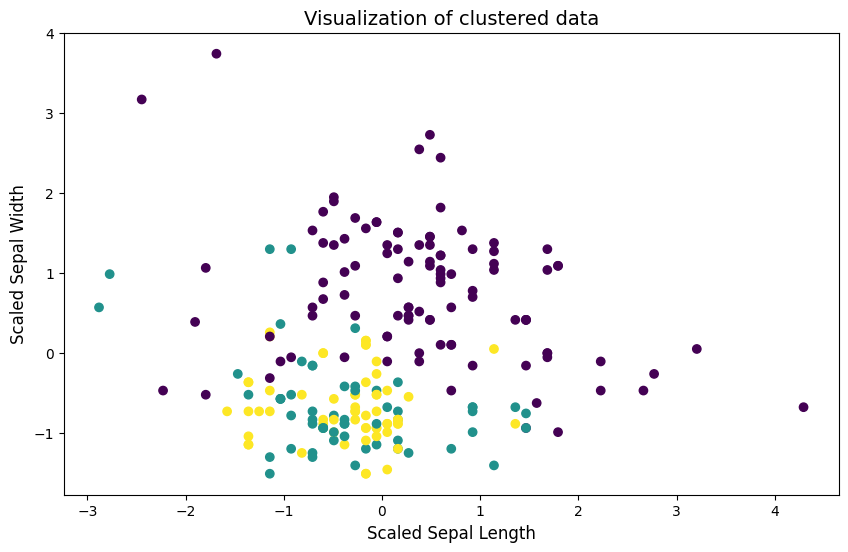

In [361]:
# Choose two dimensions to plot (e.g., sepal length and width)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_iris[:,0], scaled_iris[:,1], c=adj_clusters, cmap='viridis', marker='o')
plt.title('Visualization of clustered data', fontsize=14)
plt.xlabel('Scaled Sepal Length', fontsize=12)
plt.ylabel('Scaled Sepal Width', fontsize=12)
plt.show()

### Integrating Cluster Labels into the Iris Dataset

In [362]:
# Convert the Iris dataset to a DataFrame for easier manipulation
iris_df = pd.DataFrame(house_data, columns=house_feature_names)

# Add the cluster labels as a new column to the DataFrame
iris_df['cluster'] = adj_clusters

# Now let's see the first 5 instances of our new dataset
print(iris_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  cluster  
0      8.8        6        2  
1      9.5        6     

###  3D Visualization of Clusters

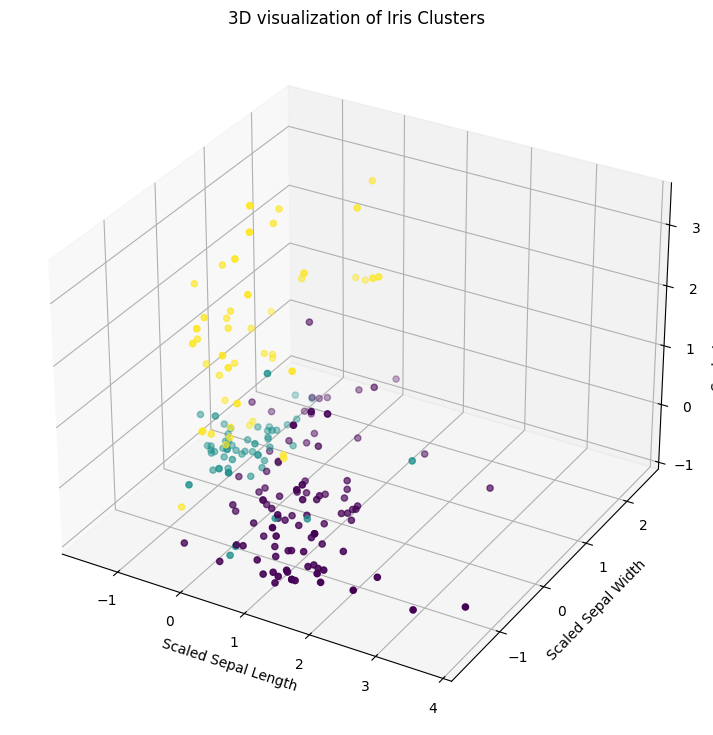

In [363]:
# Assuming you've already completed clustering with KMeans
# clusters = kmeans.fit_predict(scaled_features)

# Create a 3D figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three features of the Iris dataset
ax.scatter(scaled_iris[:,1],  # fixed acidity
           scaled_iris[:,2],  # volatile acidity
           scaled_iris[:,3],  # citric acid
        #    scaled_iris[:,4],  # residual sugar
        #    scaled_iris[:,5],  # chlorides
        #    scaled_iris[:,6],  # free sulfur dioxide
        #    scaled_iris[:,7],  # total sulfur dioxide
        #    scaled_iris[:,8],  # density
        #    scaled_iris[:,9],  # pH
        #    scaled_iris[:,10],  # sulphates
        #    scaled_iris[:,11],  # alcohol
        #    scaled_iris[:,12],  # quality
           c=adj_clusters,            # Use cluster labels as color encoding
           cmap='viridis', 
           marker='o')

# Set labels according to the features we used
ax.set_xlabel('Scaled Sepal Length')
ax.set_ylabel('Scaled Sepal Width')
ax.set_zlabel('Scaled Petal Length')

# Title of the plot
ax.set_title('3D visualization of Iris Clusters')

# Show the plot
plt.show()

----
## Association Rules

----
### Using the MLXTEND library